# Régression logistique pour prévoir des 0 et des 1 (admis ou non admis)

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

## Commencer par importer le jeu de données : Utiliser **pandas** et la fonction **read_csv**

In [14]:
election = pd.read_csv("election.csv", sep = ';')

In [18]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


## Tracer des histogrammes par variables (méthode hist)

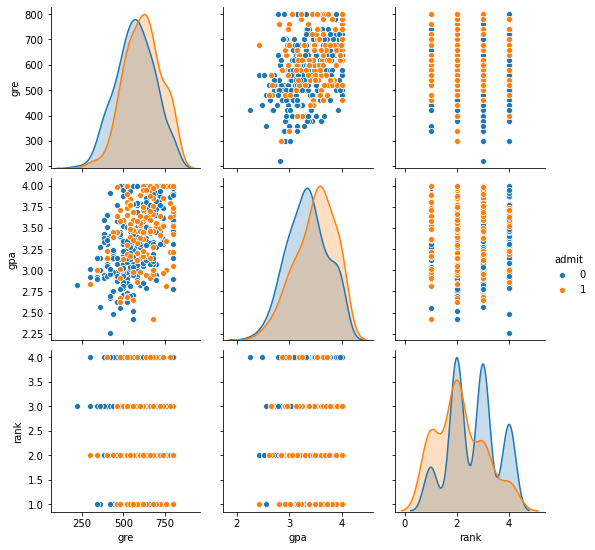

In [8]:
sns.pairplot(election, hue = "admit")

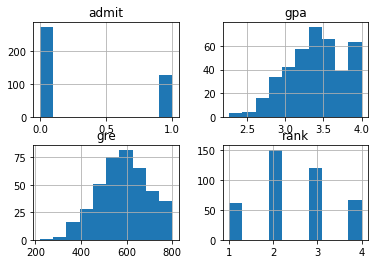

In [13]:
election.hist();

## Afficher les données

In [15]:
election.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Décrire les données

In [48]:
election.describe()

,admit,gre,gpa
count,400.000000,400.000000,400.000000
mean,0.317500,587.700000,3.389900
std,0.466087,115.516536,0.380567
min,0.000000,220.000000,2.260000
25%,0.000000,520.000000,3.130000
50%,0.000000,580.000000,3.395000
75%,1.000000,660.000000,3.670000
max,1.000000,800.000000,4.000000


In [17]:
# Convertir la variable rank en **string**
election['rank'] = election['rank'].astype(str)

## Séparer les données en train et test (from sklearn.model_selection import train_test_split)

In [20]:
election_y = election.iloc[:,0] # première colonne de prévision = vecteur
election_x = election.iloc[:,1:] # toutes les colonnes sauf la prévision
print(election_y)
print(election_x)

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64
     gre   gpa rank
0    380  3.61    3
1    660  3.67    3
2    800  4.00    1
3    640  3.19    4
4    520  2.93    4
..   ...   ...  ...
395  620  4.00    2
396  560  3.04    3
397  460  2.63    2
398  700  3.65    2
399  600  3.89    3

[400 rows x 3 columns]


In [21]:
x_train, x_test, y_train, y_test = train_test_split(election_x, election_y, test_size=0.20, random_state=42) 

## Faire une régression logistique sur le train (from sklearn.linear_model import LogisticRegression)

In [23]:
election_reg = LogisticRegression().fit(x_train, y_train)

In [24]:
# Score de régression logistique données d'entrainement du modèle
election_reg.score(x_train, y_train) # AUC toujours > 0.5 (doit être proche de 1)
# On pourrait rajouter des variables ou des lignes.
# Pour l'améliorer on pourrait faire random forest (changer de modèle) => plutôt pour le non linéaire

0.721875

In [25]:
# Score de la régression logistique données de test
election_reg.score(x_test, y_test)

0.6625

In [31]:
help(election_reg.score) # taux de bien classé

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._logistic.LogisticRegression instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



## Prévoir les individus du test (méthode prédict de votre objet LogisticRegression)

In [47]:
election_pred = election_reg.predict(x_test)
# On prévoit bcp de recalés: 1er 0 = premier indusion
print(election_pred)

[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0]


# Faire une matrice de confusion (from sklearn.metrics import confusion_matrix)

In [33]:
election_confusion_matrix = confusion_matrix(y_test,election_pred)
election_confusion_matrix # pb sur les 25 (faux négatifs) => ceux qui sont 1 et qu'on a prévu à 0

array([[51,  2],
       [25,  2]], dtype=int64)

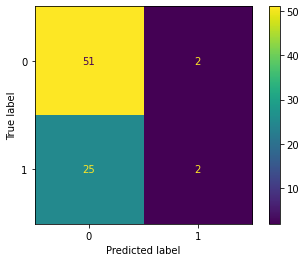

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=election_confusion_matrix, display_labels=election_reg.classes_)
disp.plot();

## Calculer un AUC (from sklearn.metrics import roc_auc_score): il faut rentrer les probabilités et non pas des chiffres

In [37]:
election_prob = election_reg.predict_proba(x_test)

array([[0.62876575, 0.37123425],
       [0.50853653, 0.49146347],
       [0.58180076, 0.41819924],
       [0.82643287, 0.17356713],
       [0.72577485, 0.27422515],
       [0.7683842 , 0.2316158 ],
       [0.91102904, 0.08897096],
       [0.60484583, 0.39515417],
       [0.87786273, 0.12213727],
       [0.46410383, 0.53589617],
       [0.49392643, 0.50607357],
       [0.50162073, 0.49837927],
       [0.80362697, 0.19637303],
       [0.88112153, 0.11887847],
       [0.6468531 , 0.3531469 ],
       [0.68221196, 0.31778804],
       [0.87412865, 0.12587135],
       [0.58686397, 0.41313603],
       [0.77980556, 0.22019444],
       [0.6449373 , 0.3550627 ],
       [0.58180076, 0.41819924],
       [0.79601291, 0.20398709],
       [0.52027269, 0.47972731],
       [0.79192021, 0.20807979],
       [0.80434878, 0.19565122],
       [0.8215059 , 0.1784941 ],
       [0.64649759, 0.35350241],
       [0.70473153, 0.29526847],
       [0.81505935, 0.18494065],
       [0.50657924, 0.49342076],
       [0.

In [38]:
# 1 car on ne prend que la colonne de la proba du 1 (admis). 
# Si on s'intéresse aux non admis, il faudrait mettre 1 non admis
# 1 = valeur de référence
election_AUC = roc_auc_score(y_test, election_prob[:, 1]) 
election_AUC

0.6457023060796646

## Coder la même chose avec une validation croisée => augmente la précision

In [46]:
cross_val_score(LogisticRegression(), x_train, y_train, cv=5) # cv = nombre de splits
cross_val_score(LogisticRegression(), x_train, y_train, cv=5).mean()

0.7184704184704184

## Tracer une courbe ROC

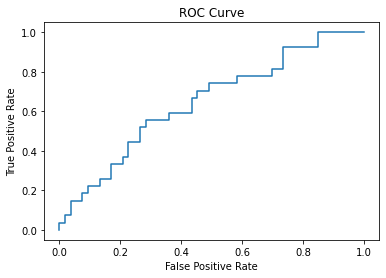

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, election_prob[:, 1])
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Une courbe ROC trace les valeurs TVP et TFP pour différents seuils de classification. 
# Diminuer la valeur du seuil de classification permet de classer plus d'éléments comme positifs, ce qui augmente le nombre de faux 
# positifs et de vrais positifs

In [57]:
# Faire varier le seuil et recalculer la matrice de confusion
# confusion_matrix(y_test, prediction[:,1]>0.2)
election_conf2 = confusion_matrix(y_test, election_pred>.2)
election_conf2

array([[51,  2],
       [25,  2]], dtype=int64)